# Plotting and Comparing

This tutorial covers the plotting module, which includes a number of utilities for plotting the attributes calculated by solute.

First, let's load in a new system. Setting up four solutions is a bit annoying and not the point of this tutorial, so that is done in setup_eax_solutes rather than in this notebook.

In [1]:
# ignore this block

import plotly.io
plotly.io.renderers.default = 'svg'
from solvation_analysis.solute import Solute
# this is a dict of dicts, {solute_name: {group_name: atom_group}}
from setup_eax_solutes import u_eax_atom_groups

/Users/orioncohen/miniconda3/envs/solvation_analysis/lib/python3.8/site-packages/statsmodels-0.12.2-py3.8-macosx-10.9-x86_64.egg/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/Users/orioncohen/miniconda3/envs/solvation_analysis/lib/python3.8/site-packages/statsmodels-0.12.2-py3.8-macosx-10.9-x86_64.egg/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



## EAx System Setup

In [2]:
solutes = {}
for eax_solvent_name, atom_groups in u_eax_atom_groups.items():
    solute = Solute.from_atoms(
        atom_groups['li'],
        {
            'pf6': atom_groups['pf6'],
            'fec': atom_groups['fec'],
            eax_solvent_name: atom_groups[eax_solvent_name],
        },
    )
    solute.run()
    solutes[eax_solvent_name] = solute

# there are four solvents, let's see what
print("Solute dict: ", solutes)
print("\nSolute names: ", *solutes.keys())

Solute dict:  {'ea': <solvation_analysis.solute.Solute object at 0x7f83591d8160>, 'eaf': <solvation_analysis.solute.Solute object at 0x7f8348d47f10>, 'fea': <solvation_analysis.solute.Solute object at 0x7f8348d57040>, 'feaf': <solvation_analysis.solute.Solute object at 0x7f834927e040>}

Solute names:  ea eaf fea feaf


Note that the solutes variable is a dictionary, where the keys are solute names and the values are the solutes themselves. As you can see, there are four solutes, each with lithium as a solute and PF6 and FEC as solvents. In addition, each has a variation of ethyl acetate with some degree of fluorination on the terminal carbons. We visualize all four molecules below.


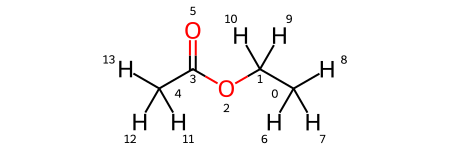

In [3]:
solutes['ea'].draw_molecule('ea')

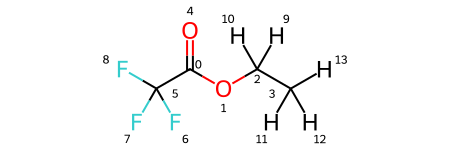

In [4]:
solutes['fea'].draw_molecule('fea')

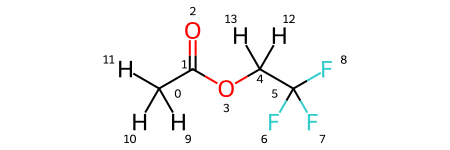

In [5]:
solutes['eaf'].draw_molecule('eaf')

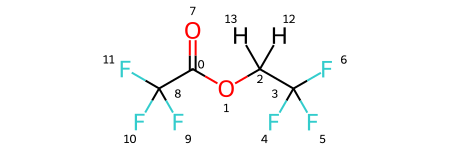

In [6]:
solutes['feaf'].draw_molecule('feaf')

## Plotting Solute Comparisons

Since we have four very similar solutes, we might be curious how solvation differs between them. Solvation Analysis provides a convenient plotting library that plots the various solvation properties both within and between species. Let's see a quick example.

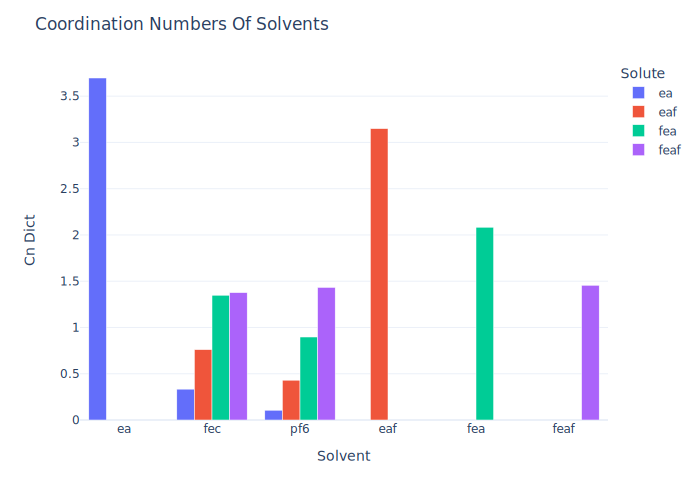

In [7]:
from solvation_analysis.plotting import compare_coordination_numbers

compare_coordination_numbers(solutes)

Let's make a few observations:
- There are six total solvents, with one unique solvent per solute (we knew that)
- The default choice is to plot solvents on the x-axis and color code solutes
- The bars are a bit oddly spaced, especially on the right side

Let's try mixing it up and plot the solutes on the axis instead of the solvent. We can do that with the `x_axis` kwarg.

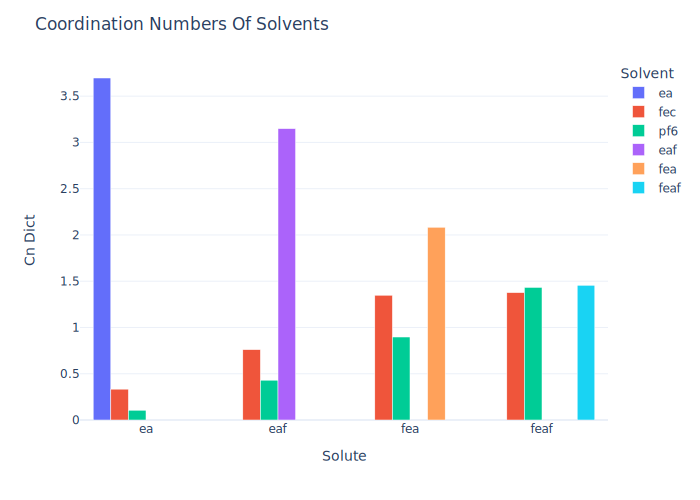

In [8]:
compare_coordination_numbers(solutes, x_axis='solute')

This looks pretty good, but what's with the bars?

The bars are oddly spaced because plotly is leaving space for ea, eaf, fea, and feaf even when there is no data for them. This produces a bit of an odd plot and its more difficult to directly compare the different solvents. We can fix this by including a `rename_solvent_dict`, which converts the names of the solvents from one string to another.

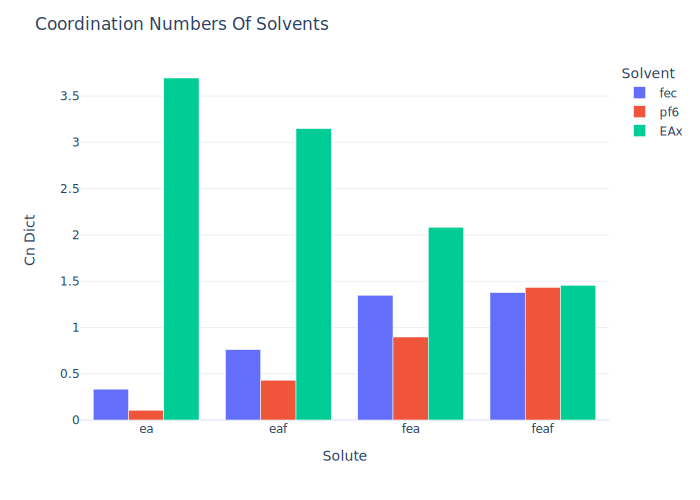

In [9]:
rename = {
    "ea": "EAx",
    "fea": "EAx",
    "eaf": "EAx",
    "feaf": "EAx",
}

compare_coordination_numbers(solutes, x_axis='solute', rename_solvent_dict=rename)


Now we have a single series representing all of our solvents. In this particular case, the degree of fluorination increases along the x-axis, though still qualitative, it could make sense to plot that as a line chart instead of a bar chart. We can do that by setting the `series` kwarg to `True`. While we are at it, let's also change the x-label to fit our new plot.

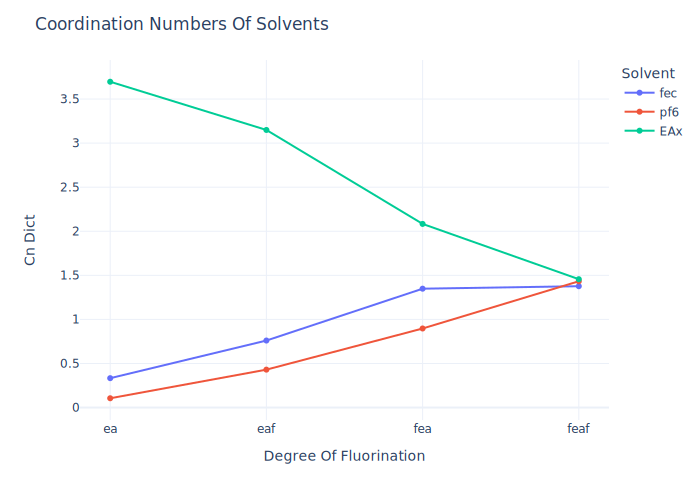

In [10]:
compare_coordination_numbers(
    solutes,
    x_axis='solute',
    rename_solvent_dict=rename,
    series=True,
    x_label="Degree of Fluorination"
)

Great! That's a quick and easy plot that clearly communicates a chemical trend! Let's imagine we are only interested in the EAx and pf6 trends, FEC be damned. We can plot only a subset of our data by modifying the `solvents_to_plot` kwarg. Note that we use the *renamed* solvent name.

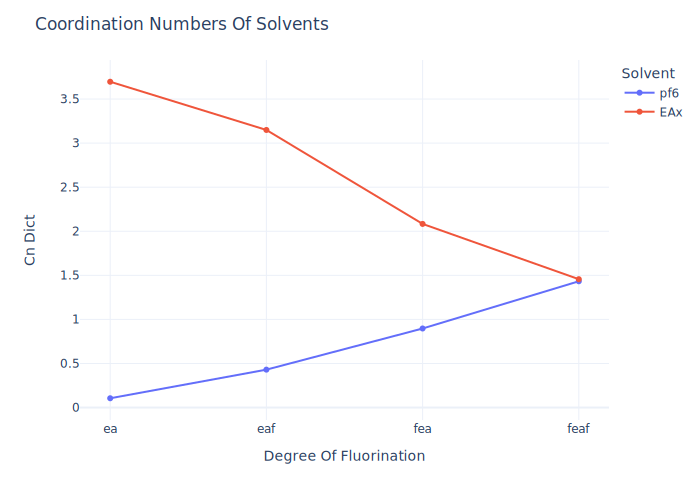

In [11]:
compare_coordination_numbers(
    solutes,
    x_axis='solute',
    rename_solvent_dict=rename,
    series=True,
    x_label="Degree of Fluorination",
    solvents_to_plot=['EAx', 'pf6'],
)

This same syntax can be used to plot diluent composition, pairing fraction, free solvent fraction, and more! Let's see some more examples in practice.

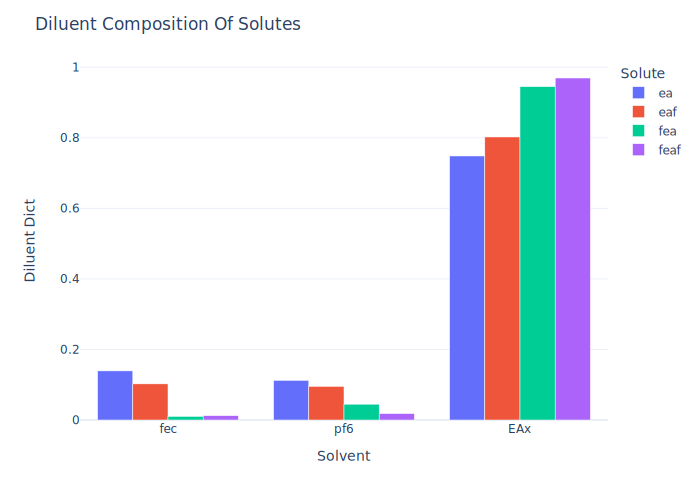

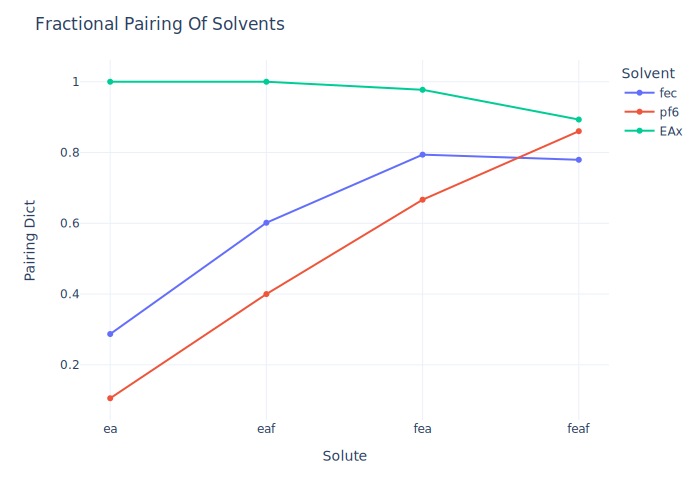

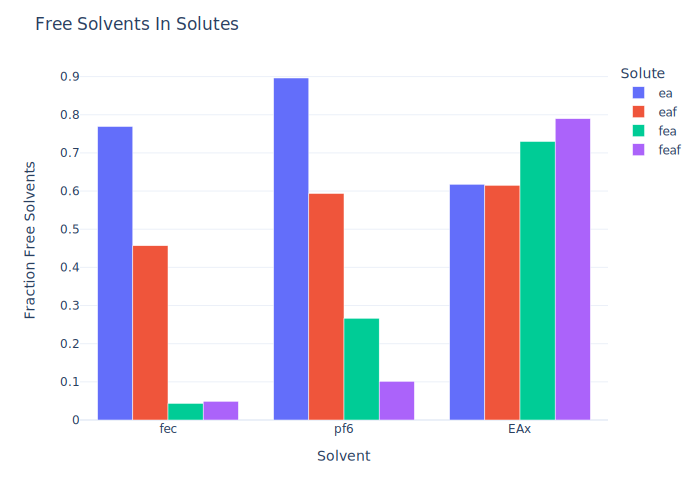

In [12]:
from solvation_analysis.plotting import compare_diluent, compare_pairing, compare_free_solvents

compare_diluent(solutes, rename_solvent_dict=rename).show()
compare_pairing(solutes, x_axis='solute', rename_solvent_dict=rename, series=True).show()
compare_free_solvents(solutes, rename_solvent_dict=rename).show()

## Plotting Single Solute Properties

Above we show a great variety of different compare functions. The plotting module also includes several functions for plotting the properties of individual solutes. We show two below using the ea solute. If you aren't familiar with the `networking` module, check out that tutorial.

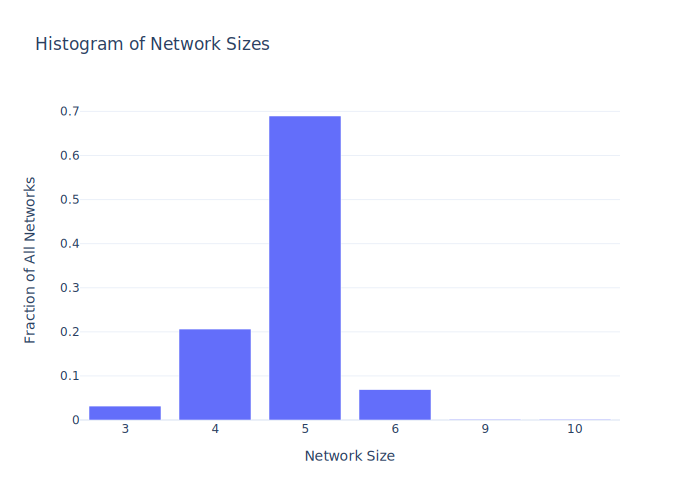

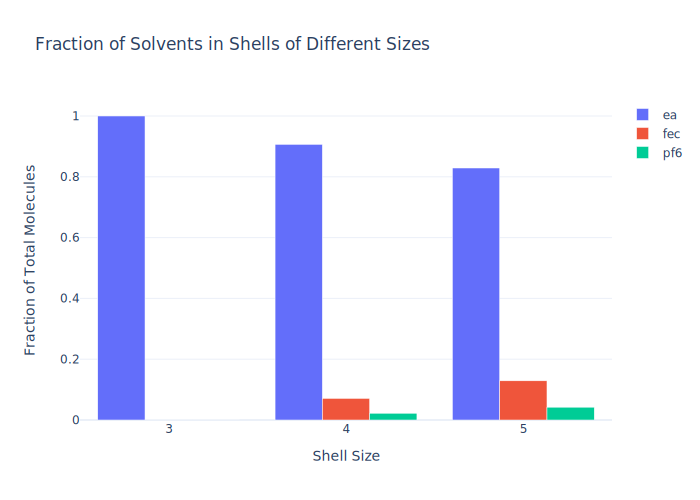

In [13]:
from solvation_analysis.networking import Networking
from solvation_analysis.plotting import plot_network_size_histogram, plot_shell_composition_by_size

ea = solutes['ea']
networking = Networking.from_solute(ea, ['pf6', 'ea'])
plot_network_size_histogram(networking).show()

plot_shell_composition_by_size(ea).show()

That's a fairly comprehensive view of the `plotting` module! More plots will be added regularly. If you have ideas of your own, please do contribute.

Go forth and plot.